### Tools

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## display all data of history in one-figure
def show_history(hist, title_name):
    # epoch as x-axis 
    epochs = range(len(hist['acc']))
    
    fig, ax1 = plt.subplots()
    
    ## left scale: acc, val_acc
    # acc
    line_acc = ax1.plot(epochs, hist['acc'], 'r', label='acc')
    # loss
#     ax1.plot(epochs, hist['loss'], 'g', label='loss')
    # val_acc
    line_val_acc = ax1.plot(epochs, hist['val_acc'], 'b', label='val_acc')
    # val_loss
#     ax1.plot(epochs, hist['val_loss'], 'k', label='val_loss')
    
    ax1.set(xlabel='epochs', ylabel='acc',title=title_name)
    
    ## right scale: loss, val_loss
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('loss', color=color)  # we already handled the x-label with ax1
    line_loss = ax2.plot(epochs, hist['loss'], 'g', label='loss')
    line_val_loss = ax2.plot(epochs, hist['val_loss'], 'k', label='val_loss')
    ax2.tick_params(axis='y', labelcolor=color)

#     ax1.legend(loc='upper right', fancybox=True,)
#     ax2.legend(loc='lower right', fancybox=True)
    
    ax1.grid(True)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    acc_patch = mpatches.Patch(color='r', label='acc',linestyle='-')
    val_acc_patch = mpatches.Patch(color='b', label='val-acc')
    loss_patch = mpatches.Patch(color='g', label='loss')
    val_loss_patch = mpatches.Patch(color='k', label='val-loss')
    fig.legend(handles=[acc_patch, val_acc_patch, loss_patch, val_loss_patch],
               ncol=4, loc='lower center',
               mode="expand", borderaxespad=0.)

    fig.show()
    
def display_history_individual(hist, title_name, acc=None, val_acc=None, loss=None, val_loss=None):
    # epoch as x-axis 
    epochs = range(len(hist['acc']))
    
    fig, ax1 = plt.subplots()
    
    ## plot y-value
    if acc == 'acc':
        ax1.plot(epochs, hist['acc'], 'r', label='acc')
    
    if loss == 'loss':
        ax1.plot(epochs, hist['loss'], 'g', label='loss')
        
    if val_acc == 'val_acc':
        ax1.plot(epochs, hist['val_acc'], 'b', label='val_acc')
    
    if val_loss == 'val_loss':
        ax1.plot(epochs, hist['val_loss'], 'k', label='val_loss')
    
    if acc or val_acc:
        ax1.set_ylabel('acc')
    else:
        ax1.set_ylabel('loss')
    ax1.set(xlabel='epochs',title=title_name)
    
    ax1.legend(loc='best', fancybox=True,)
    ax1.grid(True)
    
    fig.show()
    
def read_history_from_file(filename):
    f = open(filename,'r')
    rdbuf = f.read()
    hist = eval(rdbuf)
    f.close()
    
    return hist
    

## Models history Show

In [3]:
model_name = 'ResNet50'

def show_model_history(model_name):
    histfile = 'log/'+model_name+'_hist.txt'
    hist = read_history_from_file(histfile)
    # print(hist)

    title_name = model_name
    show_history(hist, title_name)
    display_history_individual(hist, title_name, acc='acc', val_acc='val_acc')
    display_history_individual(hist, title_name, loss='loss', val_loss='val_loss')

### SHOW

/home/jerry/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


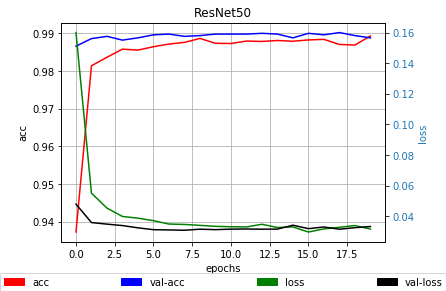

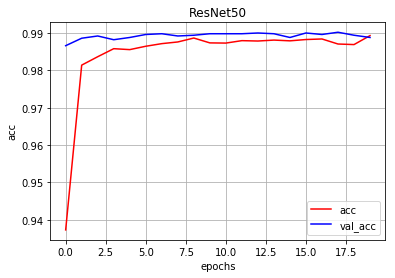

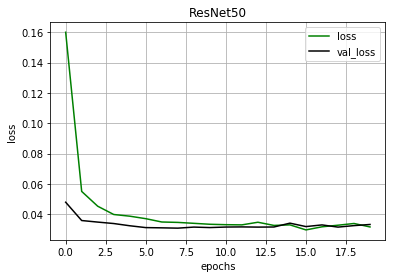

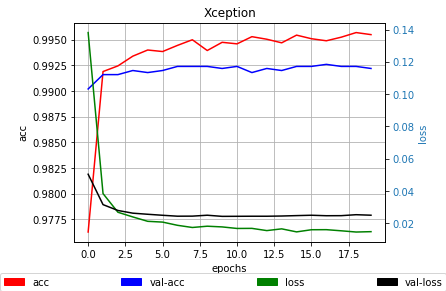

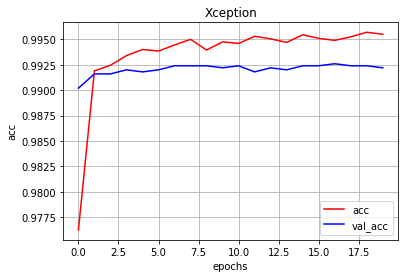

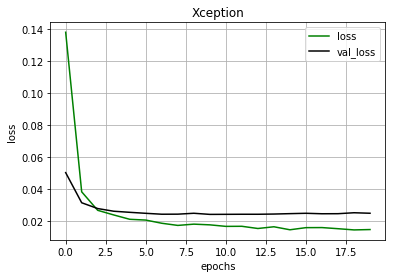

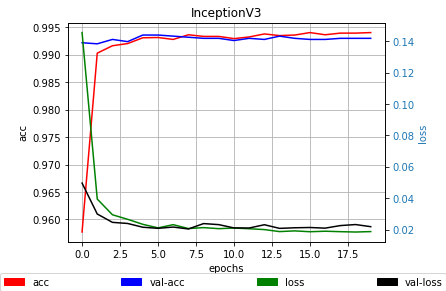

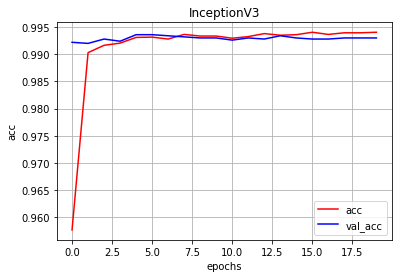

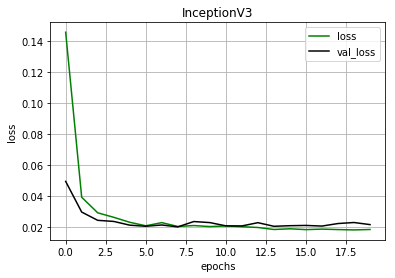

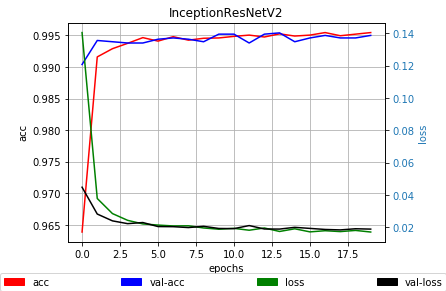

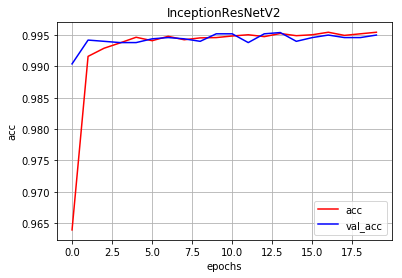

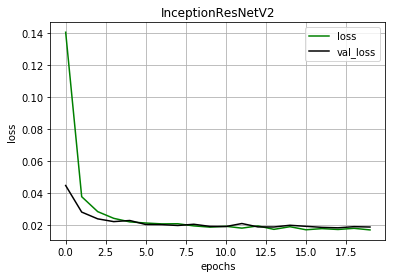

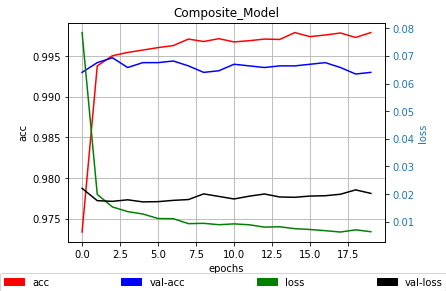

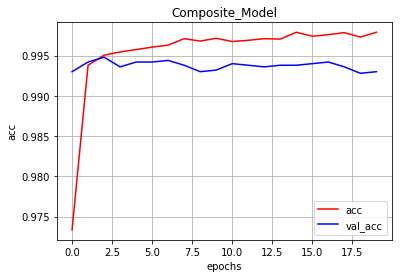

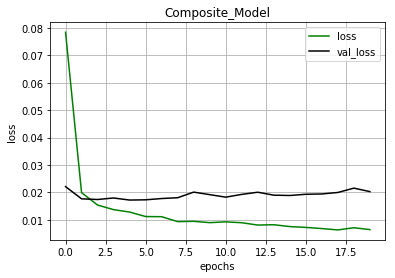

In [7]:
models_name = ['ResNet50', 'Xception', 'InceptionV3', 'InceptionResNetV2', 'Composite_Model']

for model_name in models_name:
    show_model_history(model_name)